In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Original_format (no dimensionality reduction) csv file as a dataframe
df = pd.read_csv('/Users/nikanhassanipak/Library/Mobile Documents/com~apple~CloudDocs/Georgia Tech/Spring 2024/CS 4641/Project/Original_format.csv')

# Add a column to df that extracts the base number of each song file (to be used later to ensure that all versions of a song remain on the 
# same side of the train-test split)
df['base_num'] = df['base_name'].apply(lambda x: int(x.split('.')[-1]))
df

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var,mfcc20_var,genre,base_name,base_num
0,jazz.00054.wav,0.278350,0.083777,0.162285,0.002734,1670.514952,255435.104508,2109.840494,191677.107160,3464.615835,...,49.986897,56.108070,44.334808,56.535625,60.792698,52.402107,100.981697,jazz,jazz.00054,54
1,jazz.00054.wav_noise,0.278534,0.083735,0.162372,0.002731,1873.114099,195629.983148,2401.186979,105595.733654,3976.104293,...,49.982077,54.586213,44.082935,54.956999,59.712637,50.444443,98.810023,jazz,jazz.00054,54
2,jazz.00054.wav_stretch,0.281529,0.084627,0.110718,0.001720,1682.177749,262527.779600,2124.657374,188803.823778,3502.481357,...,54.194370,63.407555,57.184631,64.662544,60.914871,53.017963,87.638412,jazz,jazz.00054,54
3,jazz.00054.wav_shift,0.281991,0.085039,0.111249,0.001556,1556.315683,202338.670883,1941.702430,161469.252931,3218.972575,...,50.973839,54.009003,63.597214,47.786098,60.711685,71.702690,76.442741,jazz,jazz.00054,54
4,reggae.00080.wav,0.476890,0.093863,0.195643,0.010612,2539.081379,876180.289217,2644.414291,166273.908244,5260.713072,...,53.472607,70.771408,63.213917,44.314583,42.793770,66.892647,76.829124,reggae,reggae.00080,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,jazz.00033.wav_shift,0.286758,0.097999,0.048918,0.000909,1105.946842,116552.163485,1415.747937,48362.037679,2322.246875,...,28.159718,36.060966,33.795025,32.908161,40.374920,32.549992,44.468338,jazz,jazz.00033,33
3996,reggae.00099.wav,0.431152,0.081997,0.180071,0.001488,2467.192946,454208.564894,2006.401423,30952.430421,4723.590385,...,30.859421,25.813581,33.468212,42.980068,40.307625,25.604368,25.045523,reggae,reggae.00099,99
3997,reggae.00099.wav_noise,0.431302,0.081936,0.180146,0.001486,2601.299336,348220.250967,2210.863759,32341.838854,4931.894565,...,26.750030,26.455203,32.795200,46.505747,36.698436,23.679584,23.921725,reggae,reggae.00099,99
3998,reggae.00099.wav_stretch,0.417107,0.081150,0.126116,0.001083,2542.085470,427305.840162,2034.793684,30433.269199,4816.488511,...,33.039711,27.899855,40.995232,51.655884,43.510025,28.145319,32.499886,reggae,reggae.00099,99


Average classification report:
blues: Precision: 0.44839060160387845, Recall: 0.3252380952380952, F1-Score: 0.36712782702003316
classical: Precision: 0.866339658904314, Recall: 0.8708333333333333, F1-Score: 0.8569241157350499
country: Precision: 0.5891754897723999, Recall: 0.5617857142857143, F1-Score: 0.5675550770675173
disco: Precision: 0.4786527281848496, Recall: 0.5783333333333334, F1-Score: 0.5236203628090038
hiphop: Precision: 0.582443514340066, Recall: 0.529047619047619, F1-Score: 0.5436562629232964
jazz: Precision: 0.6961902029686146, Recall: 0.8064285714285715, F1-Score: 0.7371889667479239
metal: Precision: 0.745355876452077, Recall: 0.8176190476190476, F1-Score: 0.7755906744516308
pop: Precision: 0.7314246797448862, Recall: 0.721547619047619, F1-Score: 0.7134078997427886
reggae: Precision: 0.539017834334041, Recall: 0.5223809523809524, F1-Score: 0.5275739197006382
rock: Precision: 0.33086288043685796, Recall: 0.3190476190476191, F1-Score: 0.3183742217205062

Average Model Acc

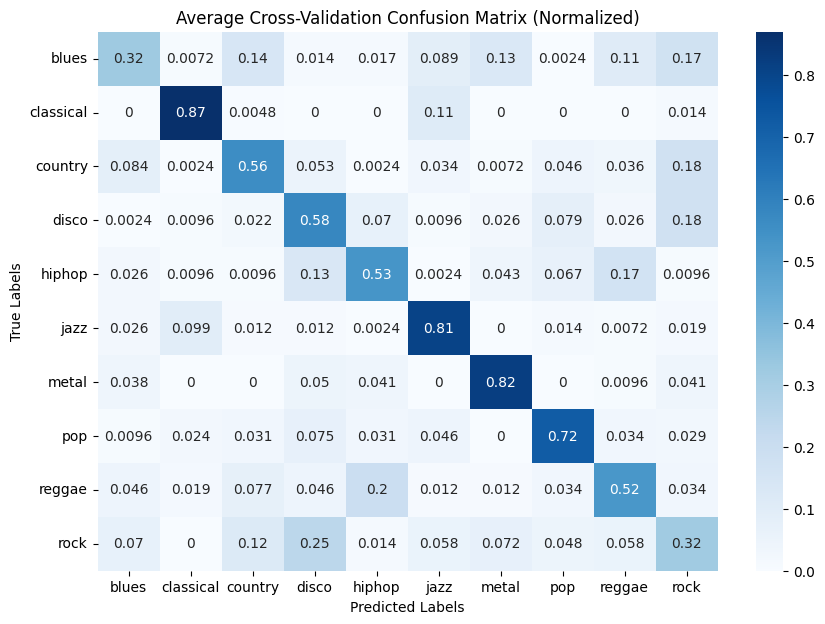

In [3]:
# Perform manual 5-fold cross-validation on a SVM model with a Radial Basis Function (RBF) kernel
# Note that this manual process was done to ensure that for each fold, all 4 versions of a song remain on the same side of the train-test split.
# This was done by using the base_num as the split index, which also ensured that the testing data for each fold had the same number of songs
# from each genre (meaning that each genre had the same support, ensuring a more inclusive evaluation of the model's performance)

# Initialize the lists that will hold the performance metrics for each fold and initialize the aggregated confusion matrix 
num_folds = 5
fold_size = 100 // num_folds
results = []
accuracies = []
aggregated_cm = np.zeros((len(np.unique(df['genre'])), len(np.unique(df['genre']))))

# Loop through each fold, defining the training and testing indices based on the 'base_num' index. Then train a SVM with a RBF kernel and 
# extract the model accuracy, precision, recall, and F1-score for each genre, as well as the confusion matrix for that fold.
# Then append metrics to their respective lists
for fold in range(num_folds):
    # Define train and test indices for 'base_num'
    test_start = fold * fold_size
    test_end = test_start + fold_size
    
    # Split the dataset for the current fold
    train_df = df[~df['base_num'].between(test_start, test_end)]
    test_df = df[df['base_num'].between(test_start, test_end)]
    
    # Define the training and testing sets (splitting into features and labels)
    X_train = train_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_train = train_df['genre']
    X_test = test_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_test = test_df['genre']
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the SVM model and make a prediction of the genre
    svm_model = SVC(kernel='rbf', gamma='scale')
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    
    # Computer the accuracy for this fold and append it to the accuracy list 
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Collect the precision, recall, and F1-score for each genre for this fold and append it to the results list
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(df['genre']))
    results.append((precision, recall, fscore))
    
    # Compute the confusion matrix for this fold and add it towards the aggregated confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(df['genre']))
    aggregated_cm += cm

# Calculate the average metrics across all 5 folds
avg_precision = np.mean([result[0] for result in results], axis=0)
avg_recall = np.mean([result[1] for result in results], axis=0)
avg_fscore = np.mean([result[2] for result in results], axis=0)
avg_accuracy = np.mean(accuracies)

# Calculate the average confusion matrix across all 5 folds (normalized across each row)
avg_cm = aggregated_cm.astype('float') / aggregated_cm.sum(axis=1)[:, np.newaxis]

# Extract all 10 genres from the dataframe
labels = np.unique(df['genre'])

# Print average results of the 5-fold cross validation
print('Average classification report:')
for i, label in enumerate(labels):
    print(f'{label}: Precision: {avg_precision[i]}, Recall: {avg_recall[i]}, F1-Score: {avg_fscore[i]}')

print(f'\nAverage Model Accuracy: {avg_accuracy}')

# Plot the average normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Cross-Validation Confusion Matrix (Normalized)')
plt.show()


Average classification report:
blues: Precision: 0.5082927655330013, Recall: 0.3295238095238095, F1-Score: 0.389397723499899
classical: Precision: 0.884297839396905, Recall: 0.8192857142857143, F1-Score: 0.8328877303415009
country: Precision: 0.4589198374245103, Recall: 0.5416666666666667, F1-Score: 0.49330712478192734
disco: Precision: 0.4734432037555488, Recall: 0.4921428571428571, F1-Score: 0.48135095378370807
hiphop: Precision: 0.5528589204178581, Recall: 0.5233333333333333, F1-Score: 0.5268384027120014
jazz: Precision: 0.6829054718236846, Recall: 0.7923809523809524, F1-Score: 0.72355718513613
metal: Precision: 0.7133872142339122, Recall: 0.8738095238095239, F1-Score: 0.7837826655536502
pop: Precision: 0.7246014261626097, Recall: 0.711547619047619, F1-Score: 0.709590617835024
reggae: Precision: 0.4846446797457524, Recall: 0.44761904761904764, F1-Score: 0.46212187342622124
rock: Precision: 0.33220756049338945, Recall: 0.27142857142857146, F1-Score: 0.29526201495445836

Average Model

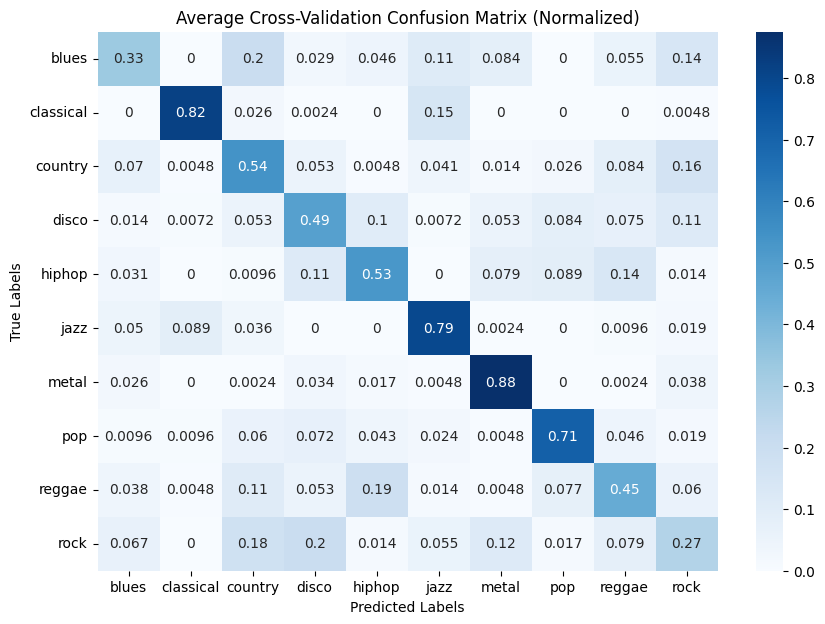

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Perform manual 5-fold cross-validation on a RFC model
# Note that this manual process was done to ensure that for each fold, all 4 versions of a song remain on the same side of the train-test split.
# This was done by using the base_num as the split index, which also ensured that the testing data for each fold had the same number of songs
# from each genre (meaning that each genre had the same support, ensuring a more inclusive evaluation of the model's performance)

# Initialize the lists that will hold the performance metrics and confusion matrix for each fold
num_folds = 5
fold_size = 100 // num_folds
results = []
accuracies = []
aggregated_cm = np.zeros((len(np.unique(df['genre'])), len(np.unique(df['genre']))))

# Loop through each fold, defining the training and testing indices based on the 'base_num' index. Then train a RFC model and 
# extract the model accuracy, precision, recall, and F1-score for each genre, as well as the confusion matrix for that fold.
# Then append metrics to their respective lists
for fold in range(num_folds):
    # Define train and test indices for 'base_num'
    test_start = fold * fold_size
    test_end = test_start + fold_size
    
    # Split the dataset for the current fold
    train_df = df[~df['base_num'].between(test_start, test_end)]
    test_df = df[df['base_num'].between(test_start, test_end)]
    
    # Define the training and testing sets (splitting into features and labels)
    X_train = train_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_train = train_df['genre']
    X_test = test_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_test = test_df['genre']
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the RFC model and make a prediction of the genre
    rfc_model = RandomForestClassifier(random_state=20)
    rfc_model.fit(X_train_scaled, y_train)
    y_pred = rfc_model.predict(X_test_scaled)
    
    # Computer the accuracy for this fold and append it to the accuracy list 
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Collect the precision, recall, and F1-score for each genre for this fold and append it to the results list
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(df['genre']))
    results.append((precision, recall, fscore))
    
    # Compute the confusion matrix for this fold and add it towards the aggregated confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(df['genre']))
    aggregated_cm += cm

# Calculate the average metrics across all 5 folds
avg_precision = np.mean([result[0] for result in results], axis=0)
avg_recall = np.mean([result[1] for result in results], axis=0)
avg_fscore = np.mean([result[2] for result in results], axis=0)
avg_accuracy = np.mean(accuracies)

# Calculate the average confusion matrix across all 5 folds (normalized across each row)
avg_cm = aggregated_cm.astype('float') / aggregated_cm.sum(axis=1)[:, np.newaxis]

# Extract all 10 genres from the dataframe
labels = np.unique(df['genre'])

# Print average results of the 5-fold cross validation
print('Average classification report:')
for i, label in enumerate(labels):
    print(f'{label}: Precision: {avg_precision[i]}, Recall: {avg_recall[i]}, F1-Score: {avg_fscore[i]}')

print(f'\nAverage Model Accuracy: {avg_accuracy}')

# Plot the average normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Cross-Validation Confusion Matrix (Normalized)')
plt.show()

